## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  70.959314  1700.612372  0.612173  4.332629  1.561971
1  24.638437  1226.351480  0.655783  7.079964  1.756344
2  62.396150   143.435332  0.454615  7.907701  0.871605
3  77.560766   887.408538  0.015938  5.282877  0.061783
4  35.023389  1508.264077  0.507325  7.490189  1.359123


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 0.9710097	total: 58ms	remaining: 58s
1:	learn: 0.9617867	total: 58.6ms	remaining: 29.3s
2:	learn: 0.9528478	total: 59.2ms	remaining: 19.7s
3:	learn: 0.9429265	total: 59.7ms	remaining: 14.9s
4:	learn: 0.9343628	total: 60.6ms	remaining: 12.1s
5:	learn: 0.9241630	total: 61.2ms	remaining: 10.1s
6:	learn: 0.9135405	total: 71.1ms	remaining: 10.1s
7:	learn: 0.9021344	total: 71.7ms	remaining: 8.89s
8:	learn: 0.8922050	total: 72.1ms	remaining: 7.94s
9:	learn: 0.8807503	total: 72.7ms	remaining: 7.2s
10:	learn: 0.8708711	total: 73.2ms	remaining: 6.58s
11:	learn: 0.8633566	total: 74.1ms	remaining: 6.1s
12:	learn: 0.8543763	total: 74.9ms	remaining: 5.69s
13:	learn: 0.8459256	total: 75.4ms	remaining: 5.31s
14:	learn: 0.8358997	total: 76.1ms	remaining: 5s
15:	learn: 0.8286835	total: 76.7ms	remaining: 4.72s
16:	learn: 0.8207590	total: 77.3ms	remaining: 4.47s


17:	learn: 0.8140704	total: 78.9ms	remaining: 4.31s
18:	learn: 0.8063221	total: 80.7ms	remaining: 4.17s
19:	learn: 0.7986460	total: 81.4ms	remaining: 3.99s
20:	learn: 0.7904168	total: 81.8ms	remaining: 3.81s
21:	learn: 0.7818832	total: 82.8ms	remaining: 3.68s
22:	learn: 0.7758413	total: 83.3ms	remaining: 3.54s
23:	learn: 0.7680270	total: 84.3ms	remaining: 3.43s
24:	learn: 0.7588035	total: 85.3ms	remaining: 3.33s
25:	learn: 0.7512469	total: 86.1ms	remaining: 3.22s
26:	learn: 0.7448293	total: 86.8ms	remaining: 3.13s
27:	learn: 0.7382800	total: 87.6ms	remaining: 3.04s
28:	learn: 0.7298156	total: 88.3ms	remaining: 2.96s
29:	learn: 0.7231927	total: 88.6ms	remaining: 2.86s
30:	learn: 0.7170199	total: 89ms	remaining: 2.78s
31:	learn: 0.7107217	total: 90.3ms	remaining: 2.73s
32:	learn: 0.7024132	total: 90.9ms	remaining: 2.66s
33:	learn: 0.6965886	total: 91.5ms	remaining: 2.6s
34:	learn: 0.6898012	total: 92.1ms	remaining: 2.54s
35:	learn: 0.6832707	total: 92.7ms	remaining: 2.48s
36:	learn: 0.67

157:	learn: 0.2867453	total: 165ms	remaining: 879ms
158:	learn: 0.2850120	total: 166ms	remaining: 877ms
159:	learn: 0.2839389	total: 167ms	remaining: 875ms
160:	learn: 0.2822013	total: 167ms	remaining: 871ms
161:	learn: 0.2802828	total: 168ms	remaining: 870ms
162:	learn: 0.2791864	total: 169ms	remaining: 867ms
163:	learn: 0.2782396	total: 169ms	remaining: 864ms
164:	learn: 0.2772472	total: 170ms	remaining: 860ms
165:	learn: 0.2757677	total: 171ms	remaining: 857ms
166:	learn: 0.2744598	total: 171ms	remaining: 854ms
167:	learn: 0.2736775	total: 172ms	remaining: 851ms
168:	learn: 0.2724914	total: 173ms	remaining: 849ms
169:	learn: 0.2710174	total: 173ms	remaining: 846ms
170:	learn: 0.2692574	total: 174ms	remaining: 843ms
171:	learn: 0.2674942	total: 175ms	remaining: 840ms
172:	learn: 0.2661975	total: 175ms	remaining: 838ms
173:	learn: 0.2648164	total: 176ms	remaining: 837ms
174:	learn: 0.2634659	total: 177ms	remaining: 834ms
175:	learn: 0.2623124	total: 178ms	remaining: 831ms
176:	learn: 

269:	learn: 0.1760320	total: 237ms	remaining: 641ms
270:	learn: 0.1755099	total: 238ms	remaining: 640ms
271:	learn: 0.1751432	total: 239ms	remaining: 639ms
272:	learn: 0.1742966	total: 239ms	remaining: 637ms
273:	learn: 0.1738462	total: 240ms	remaining: 636ms
274:	learn: 0.1731472	total: 241ms	remaining: 634ms
275:	learn: 0.1726140	total: 241ms	remaining: 633ms
276:	learn: 0.1721922	total: 242ms	remaining: 632ms
277:	learn: 0.1716871	total: 243ms	remaining: 631ms
278:	learn: 0.1712342	total: 244ms	remaining: 629ms
279:	learn: 0.1706222	total: 244ms	remaining: 628ms
280:	learn: 0.1698819	total: 245ms	remaining: 627ms
281:	learn: 0.1694054	total: 245ms	remaining: 625ms
282:	learn: 0.1690116	total: 246ms	remaining: 624ms
283:	learn: 0.1685525	total: 247ms	remaining: 622ms
284:	learn: 0.1682502	total: 247ms	remaining: 620ms
285:	learn: 0.1675203	total: 248ms	remaining: 619ms
286:	learn: 0.1670913	total: 249ms	remaining: 618ms
287:	learn: 0.1663345	total: 249ms	remaining: 616ms
288:	learn: 

401:	learn: 0.1116139	total: 319ms	remaining: 475ms
402:	learn: 0.1112210	total: 320ms	remaining: 474ms
403:	learn: 0.1107031	total: 320ms	remaining: 473ms
404:	learn: 0.1102215	total: 321ms	remaining: 471ms
405:	learn: 0.1097956	total: 321ms	remaining: 470ms
406:	learn: 0.1092624	total: 323ms	remaining: 471ms
407:	learn: 0.1089269	total: 325ms	remaining: 472ms
408:	learn: 0.1084317	total: 326ms	remaining: 471ms
409:	learn: 0.1079467	total: 326ms	remaining: 470ms
410:	learn: 0.1074933	total: 327ms	remaining: 469ms
411:	learn: 0.1069779	total: 328ms	remaining: 468ms
412:	learn: 0.1066517	total: 328ms	remaining: 467ms
413:	learn: 0.1061820	total: 329ms	remaining: 466ms
414:	learn: 0.1057221	total: 330ms	remaining: 466ms
415:	learn: 0.1052902	total: 331ms	remaining: 465ms
416:	learn: 0.1049134	total: 332ms	remaining: 464ms
417:	learn: 0.1043026	total: 333ms	remaining: 463ms
418:	learn: 0.1039356	total: 333ms	remaining: 462ms
419:	learn: 0.1034471	total: 334ms	remaining: 461ms
420:	learn: 

513:	learn: 0.0703641	total: 391ms	remaining: 369ms
514:	learn: 0.0700061	total: 392ms	remaining: 369ms
515:	learn: 0.0696194	total: 393ms	remaining: 368ms
516:	learn: 0.0693622	total: 393ms	remaining: 368ms
517:	learn: 0.0691048	total: 394ms	remaining: 367ms
518:	learn: 0.0688540	total: 395ms	remaining: 366ms
519:	learn: 0.0686339	total: 395ms	remaining: 365ms
520:	learn: 0.0683901	total: 396ms	remaining: 364ms
521:	learn: 0.0681526	total: 396ms	remaining: 363ms
522:	learn: 0.0679070	total: 396ms	remaining: 362ms
523:	learn: 0.0676761	total: 397ms	remaining: 360ms
524:	learn: 0.0675437	total: 397ms	remaining: 359ms
525:	learn: 0.0673349	total: 398ms	remaining: 359ms
526:	learn: 0.0671116	total: 399ms	remaining: 358ms
527:	learn: 0.0667637	total: 399ms	remaining: 357ms
528:	learn: 0.0665624	total: 400ms	remaining: 356ms
529:	learn: 0.0664222	total: 400ms	remaining: 355ms
530:	learn: 0.0662608	total: 401ms	remaining: 354ms
531:	learn: 0.0660468	total: 401ms	remaining: 353ms
532:	learn: 

657:	learn: 0.0436501	total: 475ms	remaining: 247ms
658:	learn: 0.0435141	total: 476ms	remaining: 246ms
659:	learn: 0.0432520	total: 477ms	remaining: 246ms
660:	learn: 0.0430453	total: 478ms	remaining: 245ms
661:	learn: 0.0428984	total: 479ms	remaining: 244ms
662:	learn: 0.0427659	total: 480ms	remaining: 244ms
663:	learn: 0.0427255	total: 481ms	remaining: 243ms
664:	learn: 0.0425818	total: 481ms	remaining: 242ms
665:	learn: 0.0424061	total: 482ms	remaining: 242ms
666:	learn: 0.0422771	total: 483ms	remaining: 241ms
667:	learn: 0.0422315	total: 484ms	remaining: 240ms
668:	learn: 0.0420343	total: 485ms	remaining: 240ms
669:	learn: 0.0419727	total: 485ms	remaining: 239ms
670:	learn: 0.0418374	total: 486ms	remaining: 238ms
671:	learn: 0.0416116	total: 487ms	remaining: 238ms
672:	learn: 0.0414732	total: 488ms	remaining: 237ms
673:	learn: 0.0412553	total: 489ms	remaining: 236ms
674:	learn: 0.0411211	total: 489ms	remaining: 236ms
675:	learn: 0.0409799	total: 490ms	remaining: 235ms
676:	learn: 

758:	learn: 0.0298770	total: 541ms	remaining: 172ms
759:	learn: 0.0297275	total: 542ms	remaining: 171ms
760:	learn: 0.0295909	total: 543ms	remaining: 171ms
761:	learn: 0.0294645	total: 544ms	remaining: 170ms
762:	learn: 0.0293913	total: 546ms	remaining: 169ms
763:	learn: 0.0292690	total: 548ms	remaining: 169ms
764:	learn: 0.0291237	total: 549ms	remaining: 169ms
765:	learn: 0.0290049	total: 550ms	remaining: 168ms
766:	learn: 0.0288628	total: 553ms	remaining: 168ms
767:	learn: 0.0287243	total: 553ms	remaining: 167ms
768:	learn: 0.0286039	total: 555ms	remaining: 167ms
769:	learn: 0.0284565	total: 556ms	remaining: 166ms
770:	learn: 0.0284043	total: 558ms	remaining: 166ms
771:	learn: 0.0282695	total: 559ms	remaining: 165ms
772:	learn: 0.0282183	total: 560ms	remaining: 164ms
773:	learn: 0.0280875	total: 560ms	remaining: 164ms
774:	learn: 0.0279825	total: 560ms	remaining: 163ms
775:	learn: 0.0278429	total: 561ms	remaining: 162ms
776:	learn: 0.0277936	total: 561ms	remaining: 161ms
777:	learn: 

888:	learn: 0.0192680	total: 624ms	remaining: 77.9ms
889:	learn: 0.0191952	total: 625ms	remaining: 77.2ms
890:	learn: 0.0191129	total: 626ms	remaining: 76.5ms
891:	learn: 0.0190359	total: 626ms	remaining: 75.8ms
892:	learn: 0.0189513	total: 627ms	remaining: 75.1ms
893:	learn: 0.0189183	total: 627ms	remaining: 74.4ms
894:	learn: 0.0188859	total: 628ms	remaining: 73.7ms
895:	learn: 0.0188331	total: 628ms	remaining: 72.9ms
896:	learn: 0.0187814	total: 629ms	remaining: 72.2ms
897:	learn: 0.0187541	total: 629ms	remaining: 71.5ms
898:	learn: 0.0186793	total: 630ms	remaining: 70.8ms
899:	learn: 0.0186537	total: 630ms	remaining: 70.1ms
900:	learn: 0.0185906	total: 631ms	remaining: 69.3ms
901:	learn: 0.0185643	total: 631ms	remaining: 68.6ms
902:	learn: 0.0184911	total: 632ms	remaining: 67.9ms
903:	learn: 0.0184577	total: 633ms	remaining: 67.2ms
904:	learn: 0.0183871	total: 633ms	remaining: 66.5ms
905:	learn: 0.0183721	total: 634ms	remaining: 65.8ms
906:	learn: 0.0183410	total: 634ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.3052161123275984


ABC Pre-generator MAE 0.3206376788343143


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

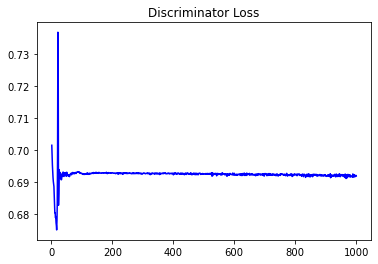

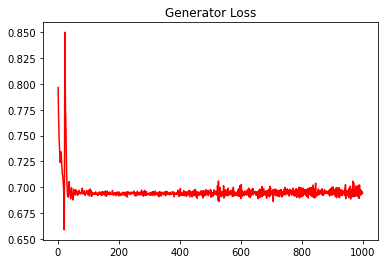

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.3384921411499381


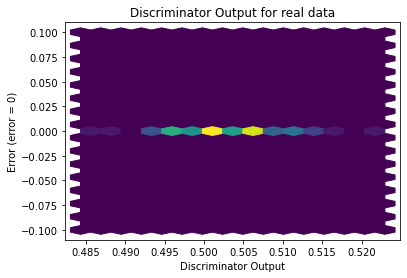

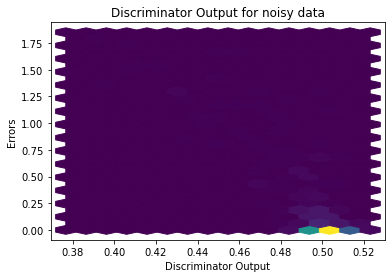

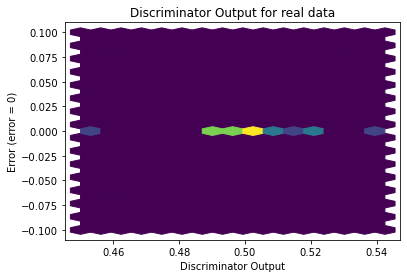

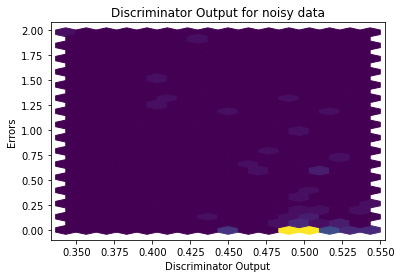

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

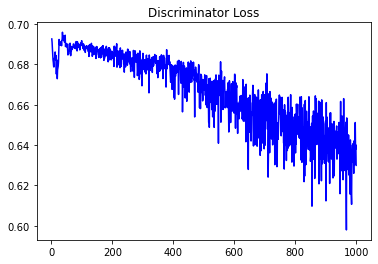

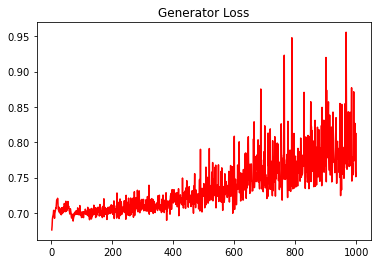

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.4339820139631629


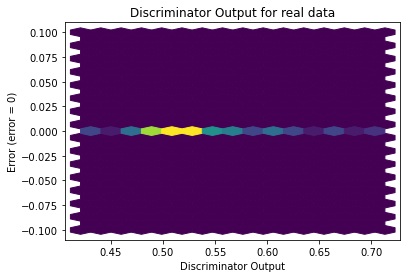

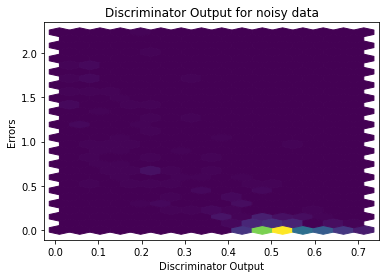

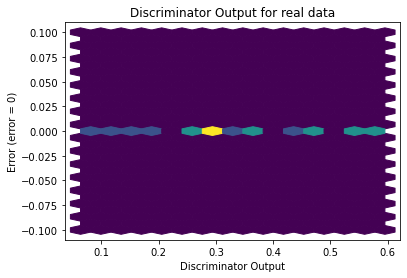

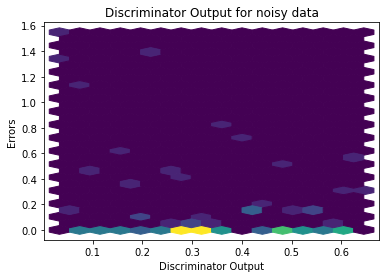

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


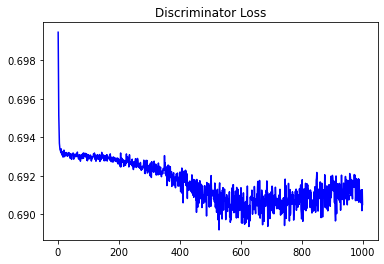

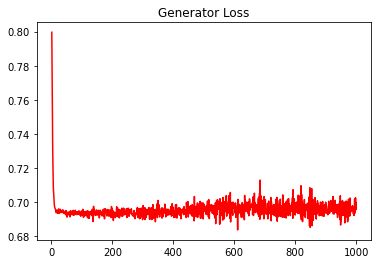

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.3227721879333258


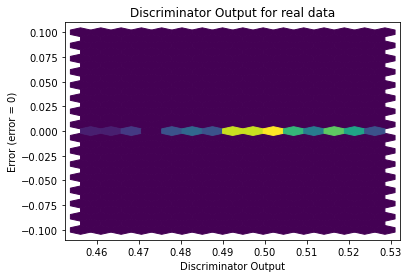

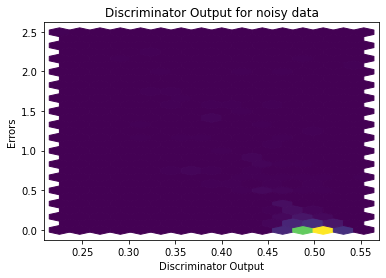

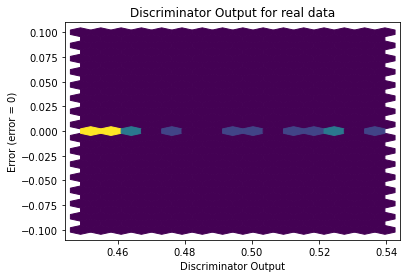

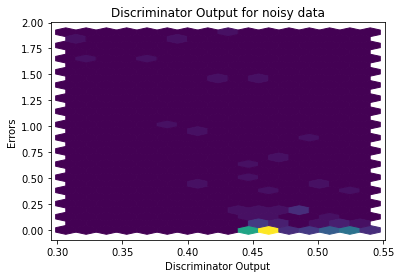

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


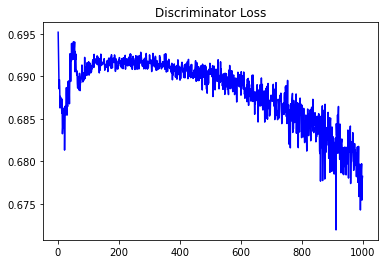

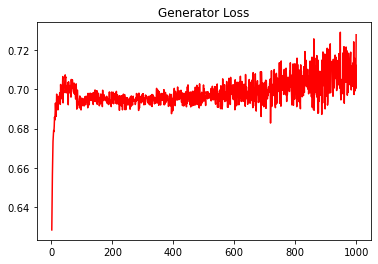

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.33545109486347063


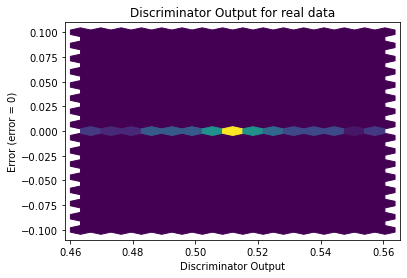

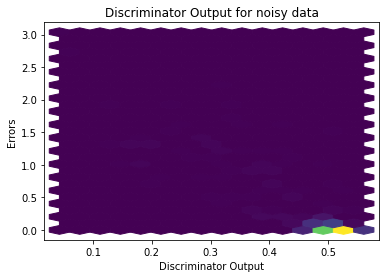

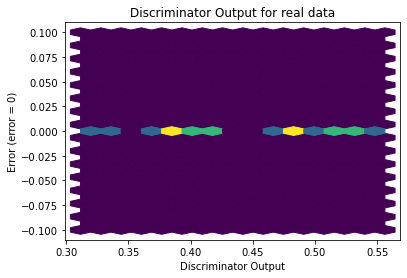

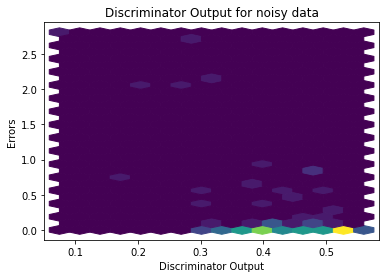

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2418]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0665]], requires_grad=True)
